## Lab 2: Clustering ##
INFO 254

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('yelp_reviewers.csv')
print(df.shape)
df.dropna().describe()

(171639, 43)


,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,...,q16r,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
count,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,...,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000
mean,6.673497,5.532121,4.990002,9.002644,1.507177,0.930915,0.863740,1.540158,26.765398,25.708965,...,3.633588,0.460916,22.550671,25.064697,0.003781,73.981978,0.642677,0.561124,1.141080,3.649456
std,7.468561,25.407165,22.812399,28.164931,0.889274,0.980001,0.951531,1.027086,10.166944,11.569436,...,1.490942,0.509305,14.454279,28.650883,0.006020,51.060694,1.427017,1.908011,3.234828,0.990191
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.780000,1.410000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,0.690000,0.000000,0.000000,0.690000,20.000000,16.670000,...,3.000000,0.000000,10.000000,9.000000,0.000477,39.125000,0.000000,0.000000,0.000000,3.200000
50%,5.000000,2.000000,2.000000,5.000000,1.610000,0.690000,0.690000,1.610000,25.930000,25.000000,...,4.000000,0.333333,21.000000,17.000000,0.001944,61.842593,0.000000,0.000000,0.500000,3.800000
75%,8.000000,4.000000,4.000000,9.000000,2.080000,1.390000,1.390000,2.200000,33.330000,33.330000,...,5.000000,0.666667,34.000000,32.000000,0.004666,95.375000,1.000000,0.000000,1.333333,4.333333
max,360.000000,2333.000000,2093.000000,2420.000000,5.890000,7.750000,7.650000,7.790000,84.620000,89.290000,...,5.000000,7.000000,53.000000,1289.000000,0.150618,549.333333,44.000000,106.000000,342.300000,5.000000


### Question 1 ###

Choose an implementation of k-means and specify it in the google sheet  

** Answer **:  


Scikit-learn


### Question 2 ###
What is the best choice of k according to the silhouette metric for clustering q4-q6 (# of cool, funny, useful votes). Only consider 2 <= k <= 8.  

NOTE: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder. This can be accomplished in MATLAB, for example, with the command:  [IDX,C]=kmeans(d,4, 'Distance', 'sqeuclidean','EmptyAction','singleton')

**Answer**:  

In [3]:
X = df[['q4', 'q5', 'q6']]
kmeans22 = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans23 = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans24 = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans25 = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans26 = KMeans(n_clusters=6, random_state=0).fit(X)
kmeans27 = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans28 = KMeans(n_clusters=8, random_state=0).fit(X)
score22 = silhouette_score(X, kmeans22.labels_, sample_size = 10000)
score23 = silhouette_score(X, kmeans23.labels_, sample_size = 10000)
score24 = silhouette_score(X, kmeans24.labels_, sample_size = 10000)
score25 = silhouette_score(X, kmeans25.labels_, sample_size = 10000)
score26 = silhouette_score(X, kmeans26.labels_, sample_size = 10000)
score27 = silhouette_score(X, kmeans27.labels_, sample_size = 10000)
score28 = silhouette_score(X, kmeans28.labels_, sample_size = 10000)

In [4]:
print (np.array([score22, score23, score24, score25, score26, score27, score28]))

[ 0.99677718  0.98502013  0.95549154  0.90921661  0.88735505  0.84171115
  0.78730497]


The best is k = 2.

***

### Question 3 ###
Answer question 2 but using the log of the features (q7-q10)

**Answer**:  

In [5]:
Y = df[['q8', 'q9', 'q10']]
Y = Y.dropna()

In [6]:
kmeans32 = KMeans(n_clusters=2, random_state=0).fit(Y)
kmeans33 = KMeans(n_clusters=3, random_state=0).fit(Y)
kmeans34 = KMeans(n_clusters=4, random_state=0).fit(Y)
kmeans35 = KMeans(n_clusters=5, random_state=0).fit(Y)
kmeans36 = KMeans(n_clusters=6, random_state=0).fit(Y)
kmeans37 = KMeans(n_clusters=7, random_state=0).fit(Y)
kmeans38 = KMeans(n_clusters=8, random_state=0).fit(Y)
score32 = silhouette_score(Y, kmeans32.labels_, sample_size = 10000)
score33 = silhouette_score(Y, kmeans33.labels_, sample_size = 10000)
score34 = silhouette_score(Y, kmeans34.labels_, sample_size = 10000)
score35 = silhouette_score(Y, kmeans35.labels_, sample_size = 10000)
score36 = silhouette_score(Y, kmeans36.labels_, sample_size = 10000)
score37 = silhouette_score(Y, kmeans37.labels_, sample_size = 10000)
score38 = silhouette_score(Y, kmeans38.labels_, sample_size = 10000)

In [7]:
print (np.array([score32, score33, score34, score35, score36, score37, score38]))

[ 0.48597136  0.38959981  0.34419548  0.31508816  0.33160312  0.32456184
  0.34898824]


The best is k = 2.

***

### Question 4 ###
Answer question 2 but using the percentage of the features (q11-q13)

**Answer**:

In [8]:
Z = df[['q11', 'q12', 'q13']]
Z = Z.dropna()

In [9]:
kmeans42 = KMeans(n_clusters=2, random_state=0).fit(Z)
kmeans43 = KMeans(n_clusters=3, random_state=0).fit(Z)
kmeans44 = KMeans(n_clusters=4, random_state=0).fit(Z)
kmeans45 = KMeans(n_clusters=5, random_state=0).fit(Z)
kmeans46 = KMeans(n_clusters=6, random_state=0).fit(Z)
kmeans47 = KMeans(n_clusters=7, random_state=0).fit(Z)
kmeans48 = KMeans(n_clusters=8, random_state=0).fit(Z)
score42 = silhouette_score(Z, kmeans42.labels_, sample_size = 10000)
score43 = silhouette_score(Z, kmeans43.labels_, sample_size = 10000)
score44 = silhouette_score(Z, kmeans44.labels_, sample_size = 10000)
score45 = silhouette_score(Z, kmeans45.labels_, sample_size = 10000)
score46 = silhouette_score(Z, kmeans46.labels_, sample_size = 10000)
score47 = silhouette_score(Z, kmeans47.labels_, sample_size = 10000)
score48 = silhouette_score(Z, kmeans48.labels_, sample_size = 10000)

In [10]:
print (np.array([score42, score43, score44, score45, score46, score47, score48]))

[ 0.48614805  0.54004779  0.59590222  0.5879288   0.61914171  0.64378054
  0.65489777]


The best is k = 8.

***

### Question 5 ###
Inspect the [best] clustering generated from question 4

In [11]:
kmeans48.labels_

array([0, 0, 0, ..., 7, 2, 7], dtype=int32)

In [12]:
kmeans48.cluster_centers_

array([[  0.30554214,   0.23182781,  99.46260846],
       [ 31.38445599,  30.40249922,  38.21043333],
       [  1.21506044,  98.23389139,   0.55108425],
       [ 98.94912977,   0.85379831,   0.19708216],
       [ 50.59671645,   2.38583102,  47.01758694],
       [  9.48795933,  23.633326  ,  66.87978695],
       [  3.90313523,  52.76883498,  43.32818021],
       [ 28.22177588,   4.02039933,  67.75771044]])

#### 5.a ####
**Question**: List the number of data points in each cluster (eg. C1: 2,000 C2: 4,200 etc)

In [13]:
number_data_points = [print ('C' + str(i+1) + ':', len(np.where(kmeans48.labels_ == i)[0])) for i in range(kmeans48.n_clusters)]

C1: 32870
C2: 19155
C3: 5543
C4: 3907
C5: 9374
C6: 11359
C7: 6781
C8: 11368


#### 5.b ####
**Question**: Were there clusters that represented very funny but useless reviewers?  

**Answer**:  

In [14]:
kmeans48.cluster_centers_

array([[  0.30554214,   0.23182781,  99.46260846],
       [ 31.38445599,  30.40249922,  38.21043333],
       [  1.21506044,  98.23389139,   0.55108425],
       [ 98.94912977,   0.85379831,   0.19708216],
       [ 50.59671645,   2.38583102,  47.01758694],
       [  9.48795933,  23.633326  ,  66.87978695],
       [  3.90313523,  52.76883498,  43.32818021],
       [ 28.22177588,   4.02039933,  67.75771044]])

Yes. Cluster 3 has funny votes approximately 98.23% but useless votes only 0.55%.

#### 5.c ####
**Question**: How many reviewers were in the cluster that represented relatively equal strength in all voting categories (assuming such a cluster exists in your clustering)?  

**Answer**:

In [15]:
kmeans48.cluster_centers_[1]
len(np.where(kmeans48.labels_ == 1)[0])

19155

Cluster 2 which has 19155 reviewers.

***

### Question 6 ###
Cluster the dataset using $k = 5$ and using features q7-q13 (log and % type votes) and q14 (most active year feature) and the natural log of q15 (avg review chars)

In [16]:
W = df[['q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
W['q15'] = np.log(W['q15'])
kmeans6 = KMeans(n_clusters=5, random_state=0).fit(W)

#### 6.a ####
**Question**: What is the silhouette metric for this clustering?   
You may use the max, as you did in question 2. For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [17]:
score6 = silhouette_score(W, kmeans6.labels_, sample_size = 10000)
score6

0.37709324020710444

#### 6.b ####
**Question**: What was the average “number of reviews per reviewer (q3)” among the points in each of the clusters (eg. C1: 1.4 C2: 4.2 C3: 3.4 etc)

In [18]:
W['labels'] = kmeans6.labels_
W['q3'] = df['q3']

In [19]:
for i in range(5):
    avg = W[W['labels'] == i]['q3'].mean()
    print ('C' + str(i+1) + ':', round(avg, 2))

C1: 7.93
C2: 4.89
C3: 6.84
C4: 4.83
C5: 8.31


***

### Question 7 ###
Cluster the dataset using the features described in question 6 + every group’s question 16 features (you may drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [20]:
D = list(df[['q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']]) + list(df.loc[:,'q16a':'q16ac'])
D = df[D]
D.isnull().sum()

q8       117853
q9       122162
q10       81153
q11       71282
q12       71282
q13       71282
q14           0
q15           0
q16a          0
q16b          0
q16c          0
q16d          0
q16e          0
q16f          0
q16g          0
q16h          0
q16i          0
q16j          0
q16k          0
q16l          0
q16m          0
q16n          0
q16o          0
q16p          0
q16q          0
q16r          0
q16s          0
q16t          0
q16u          0
q16v          0
q16w          0
q16x          0
q16y          0
q16z          0
q16aa         0
q16ab     47594
q16ac         0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values, especially q8 and q9. Let's see what the impact is of removing some of these columnsbefore removing any columns

In [21]:
D1 = D.drop(['q8', 'q9'], 1)
print (len(D.dropna()),len(D1.dropna()))

24205 65546


By removing 2 features, we double the number of rows remaining. That's pretty good.  
Preprocess categorical variables to dummy values.

In [22]:
D1 = D1.replace([np.inf, -np.inf], np.nan)
D1 = D1.dropna()
D1.dtypes[D1.dtypes == object]

q16s    object
q16t    object
dtype: object

In [23]:
D1 = D1.replace({'q16s': {"experienced": 1, "freshman": 0}, 'q16t': {"no" : 0, "yes" : 1}})

Now normalize the remaining features.

In [24]:
print(D1.columns.get_loc("q16s"), D1.columns.get_loc("q16t"))

24 25


In [25]:
D1.iloc[:,0:23] = D1.iloc[:,0:23].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
D1.iloc[:,26:] = D1.iloc[:,26:].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

#### 7.a ####
**Question**: Using the silhouette metric, what was the best k?  

**Answer**:  

In [26]:
D1 = D1.replace([np.inf, -np.inf], np.nan)
D1 = D1.dropna()

In [27]:
kmeans72 = KMeans(n_clusters=2, random_state=0).fit(D1)
kmeans73 = KMeans(n_clusters=3, random_state=0).fit(D1)
kmeans74 = KMeans(n_clusters=4, random_state=0).fit(D1)
kmeans75 = KMeans(n_clusters=5, random_state=0).fit(D1)
kmeans76 = KMeans(n_clusters=6, random_state=0).fit(D1)
kmeans77 = KMeans(n_clusters=7, random_state=0).fit(D1)
kmeans78 = KMeans(n_clusters=8, random_state=0).fit(D1)

In [28]:
score72 = silhouette_score(D1, kmeans72.labels_, sample_size = 10000)
score73 = silhouette_score(D1, kmeans73.labels_, sample_size = 10000)
score74 = silhouette_score(D1, kmeans74.labels_, sample_size = 10000)
score75 = silhouette_score(D1, kmeans75.labels_, sample_size = 10000)
score76 = silhouette_score(D1, kmeans76.labels_, sample_size = 10000)
score77 = silhouette_score(D1, kmeans77.labels_, sample_size = 10000)
score78 = silhouette_score(D1, kmeans78.labels_, sample_size = 10000)

In [29]:
print (np.array([score72, score73, score74, score75, score76, score77, score78]))

[ 0.53637903  0.33912188  0.27731754  0.2349125   0.23513791  0.25138014
  0.23489996]


The best k is 2.

#### 7.b ####
**Question**: Using the the sum of within cluster variance metric with the elbow method what was the best k?  
**Answer**:  

In [30]:
KM = [KMeans(n_clusters=k).fit(D1) for k in range(2,9)]

In [31]:
sse = [KM[i].inertia_ for i in range(len(KM))]

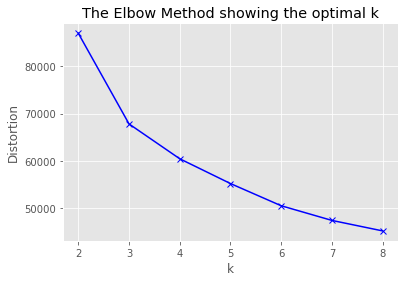

In [32]:
plt.plot(range(2,9), sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [33]:
def slope(x1, y1, x2, y2):
    return (y2-y1)/(x2-x1)
slopes = [slope(i, sse[i-2], i+1, sse[i-1]) for i in range(2,8)]
diff = [(slopes[i+1] - slopes[i]) for i in range(len(slopes)-1)]
diff

[11782.673621388392,
 2122.7474259852388,
 545.60210866023408,
 1589.9065192429771,
 880.52983501424023]

The best k is 3.

### Question 8 ###
For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. This question answer should be submitted to a bCourses assignment in the form a pdf. This report is expected to be between 2 and 3 pages. It is meant to give you practice writing up your results. The report should have the following sections:


RESEARCH QUESTION: Describe what it is you want to ask of this dataset
                 (the question can not be the same as question 9)
                 
                 
DATASET: describe the yelp_reviews to yelp_reviewers transformation. have a subsection called FEATURES SELECTED: briefly describe the features from the dataset you choose (at least 1 features should be from a q16)


METHODS: Briefly describe the methods you used (such as k-means) and why you used them


RESULTS: Here you can tell the story of how you investigated the question (plots are always nice) and the conclusions you drew.


NOTE: If you are hypothesizing that clusters might be formed with respect to a particular attribute, consider withholding that attribute from clustering and then looking to see what the mean value or distribution of that attribute is among the formed clusters.

In [34]:
# feature of percentage of "useful" votes
# features of word "awesome", "great" and "best/worst"
N = df[['q13', 'q16z', 'q16u', 'q16k']].dropna()

In [35]:
# only "best"
N[N < 0] = 0

In [36]:
KM8 = [KMeans(n_clusters=k).fit(N) for k in range(2,9)]
sse8 = [KM8[i].inertia_ for i in range(len(KM8))]

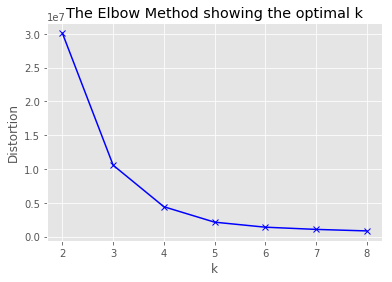

In [37]:
plt.plot(range(2,9), sse8, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [38]:
slopes8 = [slope(i, sse8[i-2], i+1, sse8[i-1]) for i in range(2,8)]
diff8 = [(slopes8[i+1] - slopes8[i]) for i in range(len(slopes8)-1)]
diff8

[13377756.891530227,
 3863993.2696106685,
 1540294.7036775297,
 416325.89034645376,
 101864.98421945178]

The best k is 3.

In [39]:
KM8[1].cluster_centers_

array([[ 96.03839886,   0.25793132,   0.43640669,   0.46556898],
       [ 50.51982632,   0.52238194,   0.46838712,   0.91207169],
       [  4.86434003,   0.23716168,   0.42064083,   0.40344472]])

In [40]:
N['labels'] = KM8[1].labels_
N1 = N[N['labels'] == 0]
N2 = N[N['labels'] == 1]
N3 = N[N['labels'] == 2]

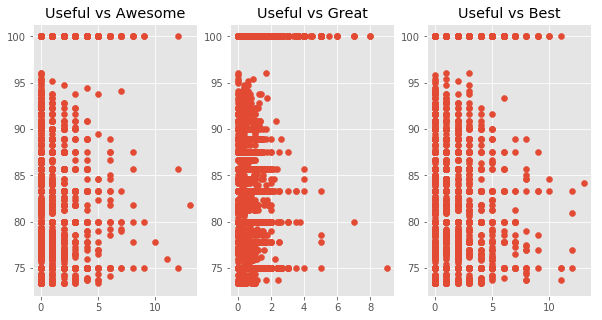

In [41]:
plt.figure(1,figsize=(10,5))
plt.subplot(131)
plt.title('Useful vs Awesome')
plt.scatter(np.array(N1['q16z']), np.array(N1['q13']))
plt.subplot(132)
plt.title('Useful vs Great')
plt.scatter(np.array(N1['q16u']), np.array(N1['q13']))
plt.subplot(133)
plt.title('Useful vs Best')
plt.scatter(np.array(N1['q16k']), np.array(N1['q13']))
plt.show()

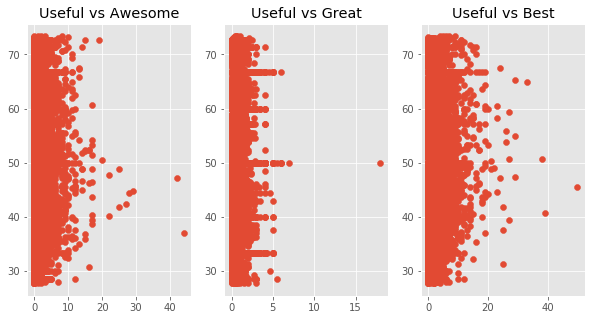

In [42]:
plt.figure(1,figsize=(10,5))
plt.subplot(131)
plt.title('Useful vs Awesome')
plt.scatter(np.array(N2['q16z']), np.array(N2['q13']))
plt.subplot(132)
plt.title('Useful vs Great')
plt.scatter(np.array(N2['q16u']), np.array(N2['q13']))
plt.subplot(133)
plt.title('Useful vs Best')
plt.scatter(np.array(N2['q16k']), np.array(N2['q13']))
plt.show()

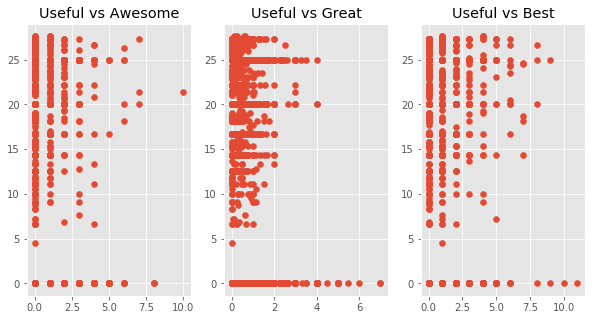

In [43]:
plt.figure(1,figsize=(10,5))
plt.subplot(131)
plt.title('Useful vs Awesome')
plt.scatter(np.array(N3['q16z']), np.array(N3['q13']))
plt.subplot(132)
plt.title('Useful vs Great')
plt.scatter(np.array(N3['q16u']), np.array(N3['q13']))
plt.subplot(133)
plt.title('Useful vs Best')
plt.scatter(np.array(N3['q16k']), np.array(N3['q13']))
plt.show()

## Bonus question (+15%) - Reviewer overlap:
Create a dataset with f reviewers as the rows and business_ids as the columns (there are a lot) where the feature value is is ‘1’ if the reviewer has written a review for that business and ‘0’ if not. Use the methods described in this assignment to answer the question of how much overlap of businesses reviewed exists among reviewers in this dataset. Append this answer to your question 8 document.